#### George Nakhleh
#### CSC 478: Assignment 2
#### Using k-nearest neighbors for classification

#### Question 2: Classification using scikit-learn)
- Experiment with various classifiers from scikit-learn, along with preprocessing and model evaluation capabilities.  
- **Dataset**: [bank_data.csv](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv)  
  - The dataset is a modified subset of real data on customers for a bank.  
  - Description of fields in [this document](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/bank-data.html)

#### 2a) Load and preprocess data using numpy or pandas and preprocessing functions of scikit-learn. 
- Separate the target attribute (*pep*) from the portion of the data to be used for training and testing.  
- Convert the selected dataset into the "Standard Spreadsheet format".  
- Split the transformed data into training and testing sets (80/20 **randomized**)

In [1]:
#Import libraries/modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Read in the data
bank_data = pd.read_csv("bank_data.csv")

#Inspect
bank_data.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


In [31]:
#Split the target attribute "pep" from the predictive attributes
#sklearn standard is to call predictive attributes' matrix X, and target y
X = bank_data.drop("pep", axis=1, inplace = False)
y = bank_data.pep

In [27]:
X.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage'],
      dtype='object')

In [32]:
#Put the data into standard spreadsheet format

#Don't need id, let's drop it
X.drop("id", axis = 1, inplace=True)

#Turn YES/NO variables into binaries
X.replace(to_replace = ['YES', 'NO'], value = [1.0, 0.0], inplace=True)

#Dummify categorical variables
def dummify(df , columns):
    dummified_cols = pd.get_dummies(df[columns])
    df = df.drop(columns, axis = 1, inplace=False)
    df_new = df.join(dummified_cols)
    return df_new

X = dummify(X, ['gender', 'region'])

#Scale continuous variables
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
X[['age', 'income', 'children']] = Scaler.fit_transform(X[['age', 'income', 'children']])

In [35]:
X.head(5)

,age,income,children,married,car,savings_acct,current_acct,mortgage,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,0.612245,0.215634,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.448980,0.431395,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.673469,0.198933,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.102041,0.264320,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.795918,0.783987,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
#Perform an 80/20 training/testing randomized split on the data

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 17, stratify = y)

#### 2b) Run scikit-learn's KNN classifier on the test set.
- Make sure data is on the same scale  
- Generate a confusion matrix and visualize it, and generate a classification report  
- Compute the average accuracy score  
- See if changing weights or k can improve accuracy

In [41]:
#Make the K-nearest neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

bank_knn = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
bank_knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [42]:
bank_knn.predict(X_test)

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO'], dtype=object)

In [44]:
#How do we evaluate the model?
bank_knn.score(X_test, y_test)


0.59166666666666667

In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_knn.predict(X_test))

print(knn_confusion_matrix)
#interpreting results:
# [0,0] = true negatives
# [1,0] = false negatives
# [1,1] = true positives
# [0,1] = false positives

[[51 14]
 [35 20]]


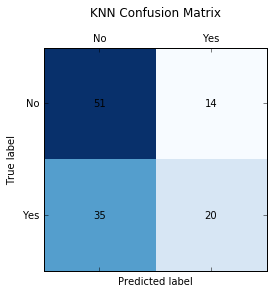

In [61]:
#Format that confusion matrix
#For placing the actual numbers in the center, code based on stackoverflow answer below:
# Link: http://stackoverflow.com/a/11918066

plt.matshow(knn_confusion_matrix, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knn_confusion_matrix.shape[0]):
    for x in range(knn_confusion_matrix.shape[1]):
        plt.text(x, y, '{}'.format(knn_confusion_matrix[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [62]:
#Generate the classification report

from sklearn.metrics import classification_report

knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))

In [64]:
print(knn_classif_report)  #neat

             precision    recall  f1-score   support

         NO       0.59      0.78      0.68        65
        YES       0.59      0.36      0.45        55

avg / total       0.59      0.59      0.57       120



Bring it all together: tweak KNN model, and evaluate

In [81]:
bank_knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.65      0.66      0.66        65
        YES       0.59      0.58      0.59        55

avg / total       0.62      0.62      0.62       120
 
Accuracy:  0.625


In [80]:
bank_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',
                                metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.65      0.69      0.67        65
        YES       0.61      0.56      0.58        55

avg / total       0.63      0.63      0.63       120
 
Accuracy:  0.633333333333


In [79]:
bank_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',
                                metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.66      0.80      0.72        65
        YES       0.68      0.51      0.58        55

avg / total       0.67      0.67      0.66       120
 
Accuracy:  0.666666666667


In [78]:
bank_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',
                                metric='manhattan')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.66      0.82      0.73        65
        YES       0.70      0.51      0.59        55

avg / total       0.68      0.68      0.67       120
 
Accuracy:  0.675


In [77]:
bank_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'distance',
                                metric='manhattan')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.69      0.71      0.70        65
        YES       0.64      0.62      0.63        55

avg / total       0.67      0.67      0.67       120
 
Accuracy:  0.666666666667


In [88]:
bank_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',
                                metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.66      0.80      0.72        65
        YES       0.68      0.51      0.58        55

avg / total       0.67      0.67      0.66       120
 
Accuracy:  0.666666666667


In [76]:
bank_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform',
                                metric='manhattan')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.65      0.85      0.74        65
        YES       0.72      0.47      0.57        55

avg / total       0.69      0.68      0.66       120
 
Accuracy:  0.675


In [75]:
bank_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance',
                                metric='manhattan')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.68      0.75      0.72        65
        YES       0.67      0.58      0.62        55

avg / total       0.67      0.68      0.67       120
 
Accuracy:  0.675


In [84]:
bank_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance',
                                metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.63      0.65      0.64        65
        YES       0.57      0.55      0.56        55

avg / total       0.60      0.60      0.60       120
 
Accuracy:  0.6


In [82]:
bank_knn = KNeighborsClassifier(n_neighbors = 20, weights = 'distance',
                                metric='manhattan')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAccuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.66      0.80      0.72        65
        YES       0.68      0.51      0.58        55

avg / total       0.67      0.67      0.66       120
 
Accuracy:  0.666666666667


**Results**  

Increasing k:  
  - Improves precision overall and for both classes
  - Improves recall overall, but decreases for the 'YES' class
  - Accuracy peaks at around 67% (around k=10)  

Changing weights:  
  - Using uniform weighting vs distance weighting doesn't affect accuracy
  - Distance improves precision for 'YES', hurts it for 'NO'  

Distance measure:
  - Manhattan seems to have better accuracy than Euclidean